In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
!pip install numpy scipy scikit-learn
!pip install nltk
!pip install tensorflow
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
!pip install plotly
!pip install --upgrade numpy
!pip install --upgrade nbformat
!pip install spacy
!pip install WordCloud
!pip install gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
from gensim.models import FastText
from keras.models import Sequential
from keras import layers
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/A-Data/Hotel_Reviews.csv')


### DATA ANALYSIS

<ipython-input-3-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

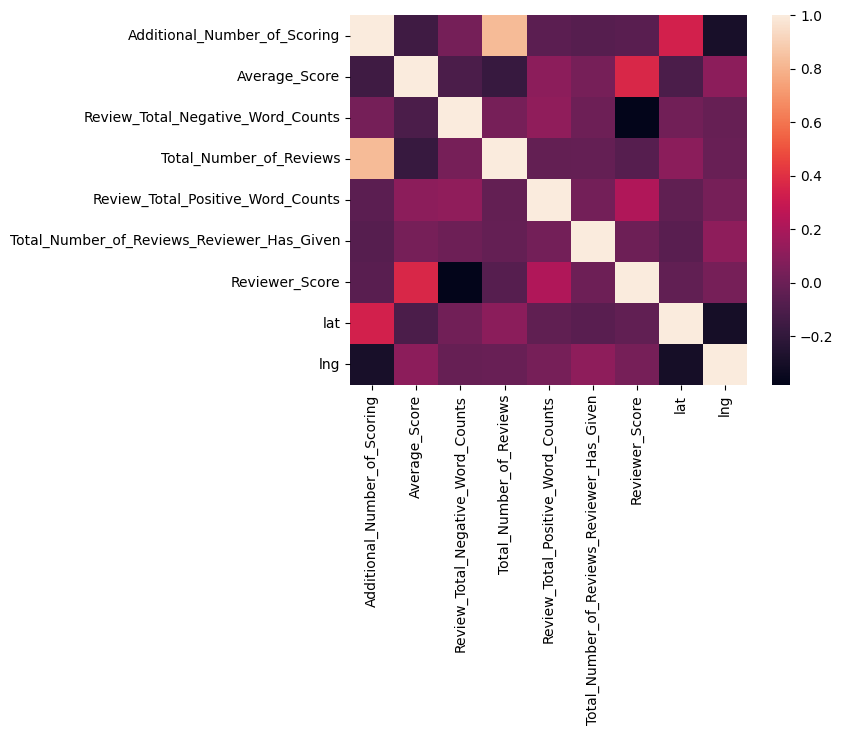

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.000000,169.000000,341.000000,660.000000,2682.000000
Average_Score,515738.0,8.397487,0.548048,5.200000,8.100000,8.400000,8.800000,9.800000
Review_Total_Negative_Word_Counts,515738.0,18.539450,29.690831,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,515738.0,2743.743944,2317.464868,43.000000,1161.000000,2134.000000,3613.000000,16670.000000
Review_Total_Positive_Word_Counts,515738.0,17.776458,21.804185,0.000000,5.000000,11.000000,22.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,7.166001,11.040228,1.000000,1.000000,3.000000,8.000000,355.000000
Reviewer_Score,515738.0,8.395077,1.637856,2.500000,7.500000,8.800000,9.600000,10.000000
lat,512470.0,49.442439,3.466325,41.328376,48.214662,51.499981,51.516288,52.400181
lng,512470.0,2.823803,4.579425,-0.369758,-0.143372,0.010607,4.834443,16.429233


In [ ]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [ ]:
df.dropna(inplace=True,axis=0)
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [ ]:
print("Duplicated rows before: ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicated rows after: ",df.duplicated().sum())

Duplicated rows before:  526
Duplicated rows after:  0


In [ ]:
from wordcloud import WordCloud
import plotly.express as px


text = " ".join(df[df["Reviewer_Score"] >= 8]["Positive_Review"])
wordcloud = WordCloud(width=1200, height=600).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Positive Reviews")
fig.show()

In [ ]:
text = " ".join(df[df["Reviewer_Score"] <= 4]["Negative_Review"])
wordcloud = WordCloud(width=800, height=400).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Negative Reviews")
fig.show()

### PRE-PROCESSING

In [ ]:
positive = df[df['Negative_Review'] == 'No Negative']
positive = positive[positive['Positive_Review'] != 'No Positive']


In [ ]:
negative = df[df['Positive_Review'] == 'No Positive']
negative = negative[negative['Negative_Review'] != 'No Negative']

In [ ]:
neutral = df[df['Positive_Review'] == 'No Positive']
neutral = neutral[neutral['Negative_Review'] == 'No Negative']

In [ ]:
X = [i[1] for i in list(positive['Positive_Review'].items())]
y = [1]*len(X)

for i in list(negative['Negative_Review'].items()):
    X.append(i[1])
    y.append(0)

len(X), len(y)

(163582, 163582)

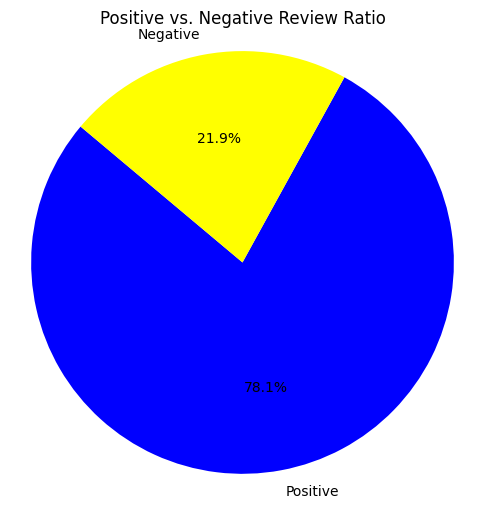

In [ ]:
# Counting the number of positive and negative reviews
positive_count = len(positive)
negative_count = len(negative)

# Creating labels and sizes for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'yellow'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title("Positive vs. Negative Review Ratio")
plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess_text(sen):
    TAG_RE = re.compile(r'<[*%>]+>')
    def remove_tags(text):
       return TAG_RE.sub('', text)
    # Removing html tags
    sentence = remove_tags(sen)
    sentence = BeautifulSoup(sentence, "html.parser").text

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Lemmatization
    words = sentence.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    sentence = ' '.join(words)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence



In [ ]:
for sen in range(len(X)):
  X[sen] = preprocess_text(X[sen])

In [ ]:
from sklearn.model_selection import train_test_split

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create Count vectorizers for training and test data
vect = CountVectorizer(stop_words='english', max_features=50000)
X_train_count = vect.fit_transform(X_train)
X_test_count = vect.transform(X_test)

In [ ]:
acc=[]
f1=[]

Accuracy: 0.8965369685484611
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74      7182
           1       0.91      0.96      0.94     25535

    accuracy                           0.90     32717
   macro avg       0.87      0.81      0.84     32717
weighted avg       0.89      0.90      0.89     32717



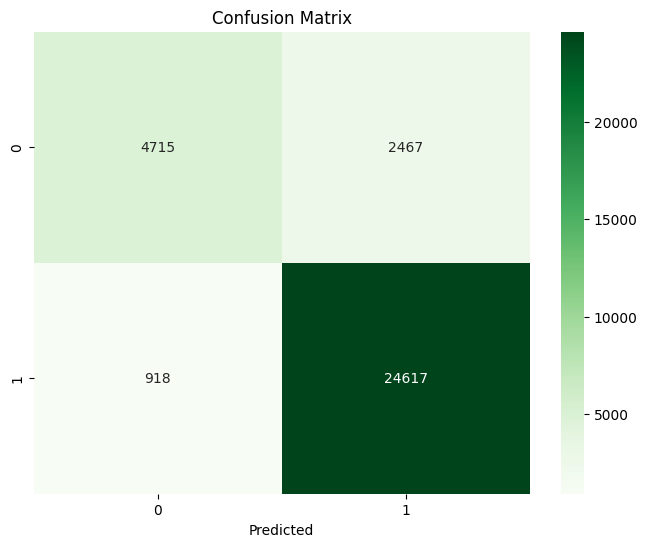

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Create a k-Nearest Neighbors (k-NN) model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN model
knn_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = knn_model.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9369244510148141
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      7245
           1       0.95      0.97      0.96     25224

    accuracy                           0.94     32469
   macro avg       0.92      0.90      0.91     32469
weighted avg       0.94      0.94      0.94     32469



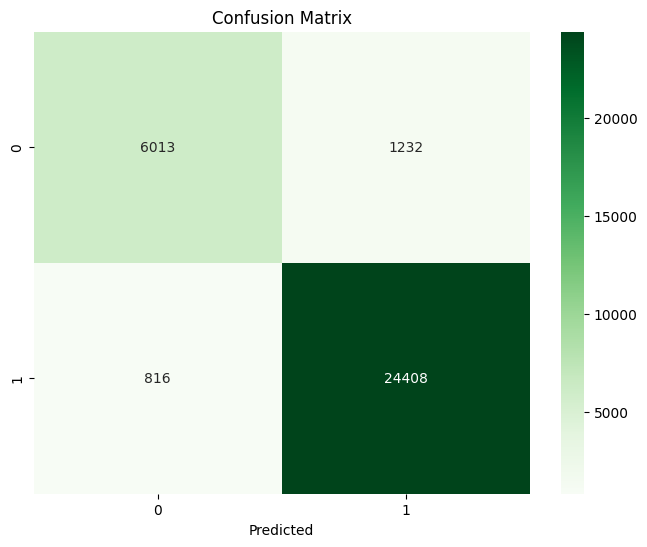

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Create a Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Train the Multinomial Naive Bayes model
mnb_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = mnb_model.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9406424794449368
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      7182
           1       0.96      0.97      0.96     25535

    accuracy                           0.94     32717
   macro avg       0.92      0.90      0.91     32717
weighted avg       0.94      0.94      0.94     32717



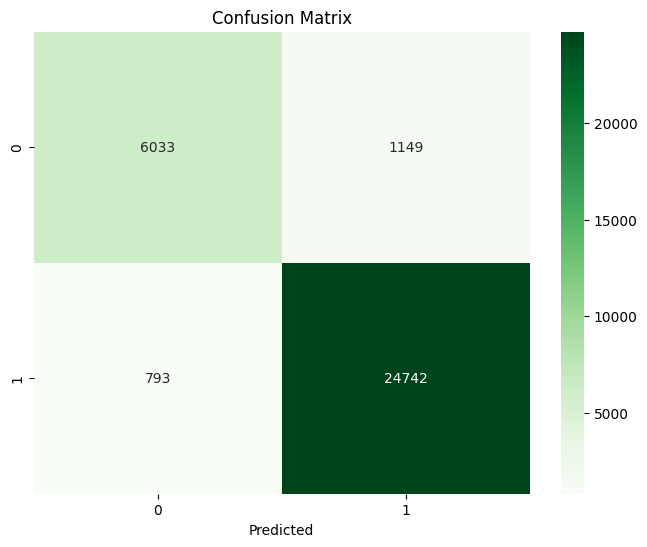

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the Logistic Regression model
logreg_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = logreg_model.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install shap

  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


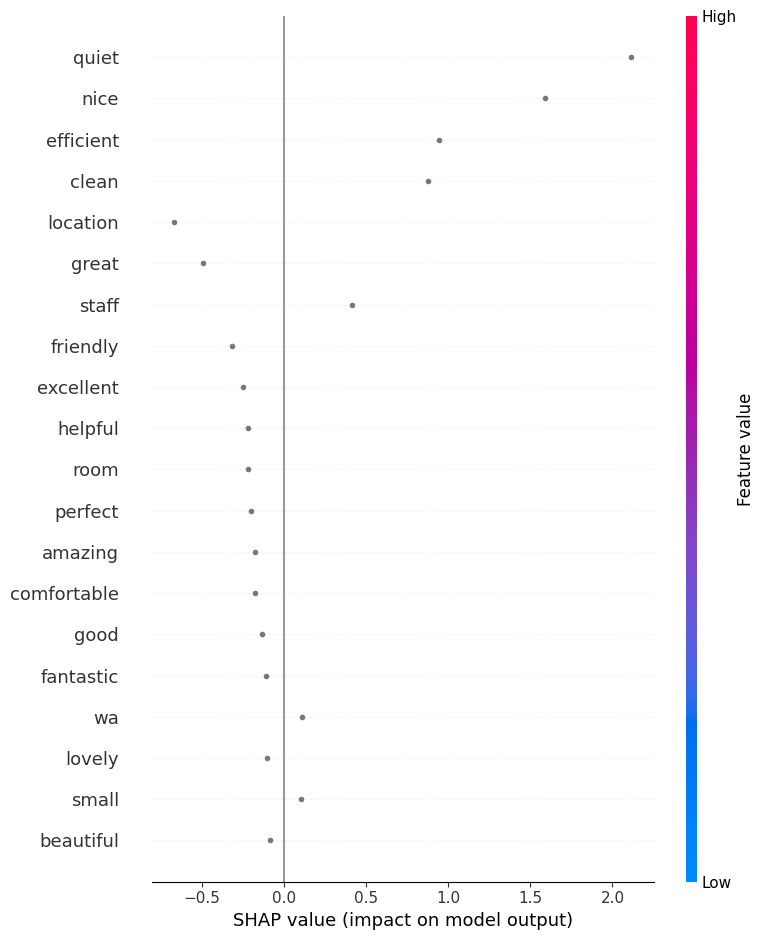

In [ ]:
import shap
# Initialize the SHAP explainer for your model
explainer = shap.Explainer(logreg_model, X_train_count)

# Calculate SHAP values for a sample of your test data
sample_idx = 21
shap_values = explainer.shap_values(X_test_count[sample_idx])

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_count[sample_idx], feature_names=vect.get_feature_names_out())


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a605124c7fd05ffbd4c7c8206df4f795467706dc91f674cfbc876b1e002780c1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer
from lime.lime_tabular import LimeTabularExplainer
from sklearn.pipeline import make_pipeline


c = make_pipeline(vect, logreg_model)
class_names = ['Negative', 'Positive']
explainer = LimeTextExplainer(class_names=class_names)


# Predict and explain given instance
index = 279
exp = explainer.explain_instance(list(X_test)[index],
                                 classifier_fn=c.predict_proba,
                                 num_features=10)

In [ ]:
exp.show_in_notebook(text=True)
print ('Explanation for class %s' % class_names [1])
print ('\n'.join(map(str, exp.as_list())))


Explanation for class Positive
('nice', 0.14999684349309192)
('Good', 0.13046224252939861)
('service', 0.021599933541382683)
('hotel', 0.015592061510434888)
('A', 0.00781571952789409)
('very', 0.006911742791860005)


### **others**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Create a Linear Regression model
lr_model = LinearRegression()

# Train the Linear Regression model
lr_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = lr_model.predict(X_test_count)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.13


Accuracy: 0.89947334380486
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      7245
           1       0.93      0.94      0.94     25224

    accuracy                           0.90     32469
   macro avg       0.86      0.85      0.85     32469
weighted avg       0.90      0.90      0.90     32469



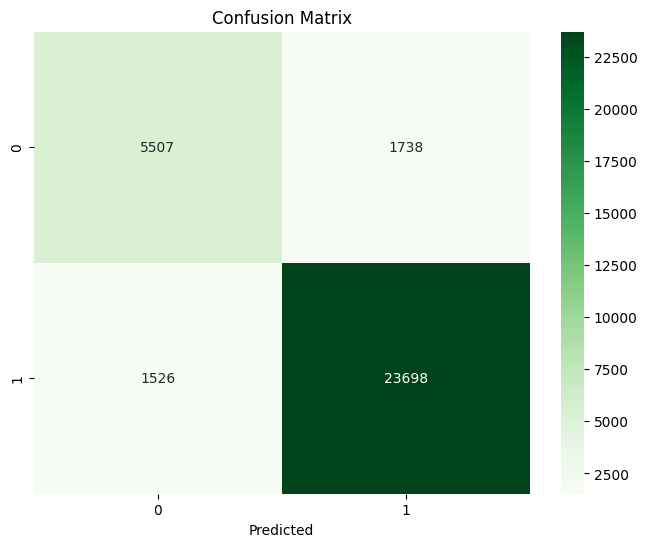

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
tree_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = tree_model.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9392959438233391
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      7245
           1       0.95      0.97      0.96     25224

    accuracy                           0.94     32469
   macro avg       0.92      0.90      0.91     32469
weighted avg       0.94      0.94      0.94     32469



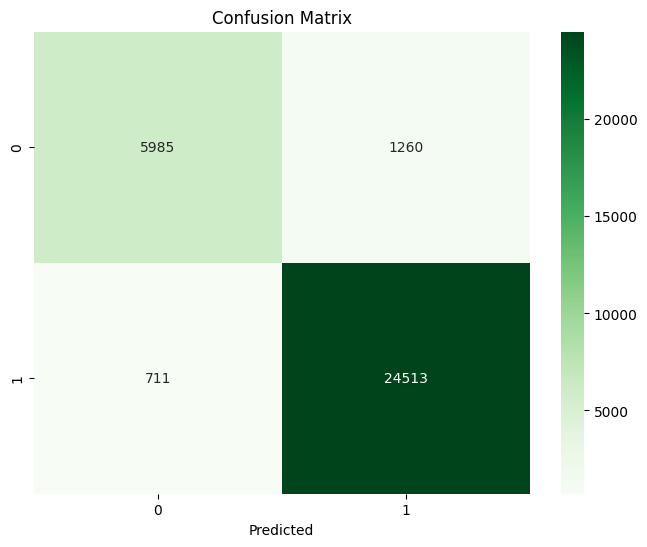

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = rf_model.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9411438602975145
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      7245
           1       0.95      0.97      0.96     25224

    accuracy                           0.94     32469
   macro avg       0.93      0.90      0.91     32469
weighted avg       0.94      0.94      0.94     32469



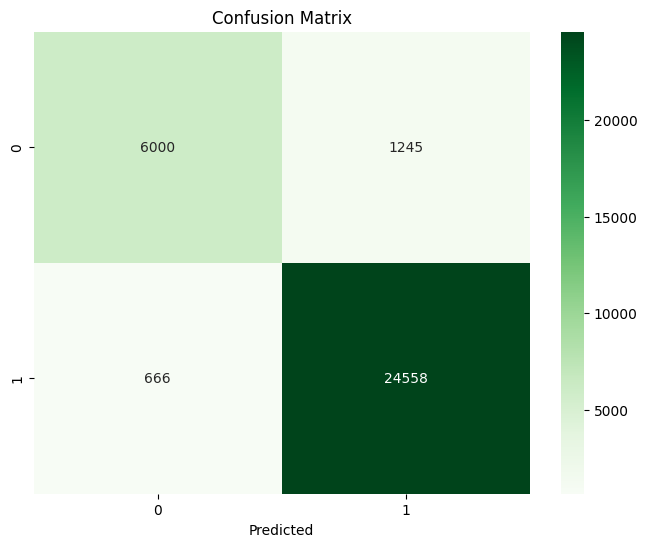

In [ ]:
from sklearn.svm import SVC
# Create an SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = svm_model.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8814253595737472
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.58      0.69      7245
           1       0.89      0.97      0.93     25224

    accuracy                           0.88     32469
   macro avg       0.86      0.77      0.81     32469
weighted avg       0.88      0.88      0.87     32469



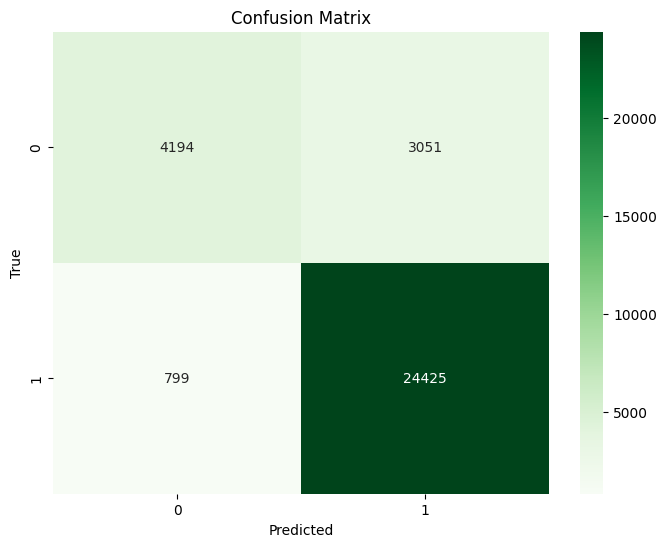

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train_count, y_train)

y_pred = adaboost_classifier.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Accuracy: 0.9301795558840741
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      7245
           1       0.95      0.96      0.96     25224

    accuracy                           0.93     32469
   macro avg       0.90      0.90      0.90     32469
weighted avg       0.93      0.93      0.93     32469



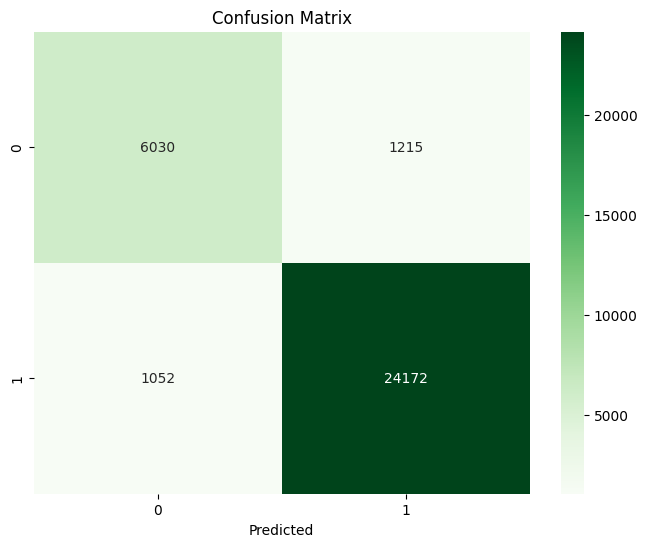

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create an MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 50), max_iter=100)

# Train the MLP classifier
mlp_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred = mlp_model.predict(X_test_count)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc

[0.8977486217622963,
 0.9369244510148141,
 0.9430225753795929,
 0.89947334380486,
 0.9392959438233391,
 0.9411438602975145,
 0.8814253595737472,
 0.9301795558840741]

### TOKENIZER

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

tokenizer = Tokenizer (num_words=5000)
tokenizer. fit_on_texts(X_train)

X_train_ = tokenizer.texts_to_sequences(X_train)
X_test_ = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved @ index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train_pad = pad_sequences(X_train_, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_, padding='post', maxlen=maxlen)

### PRE-TRAINED GLOVE EMBEDDING

In [ ]:

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/A-Data/glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype='float32')
  embeddings_dictionary [word] = vector_dimensions
glove_file.close()



In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector


glove_embeddings=embedding_matrix

### **DEEP-LEARNING MODELS**




### ATTENTION BASED LSTM

In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Attention, Concatenate, Flatten

embedding_dim = 100
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=maxlen)(inputs)
lstm_layer = LSTM(64, return_sequences=True)(embedding_layer)

# Attention mechanism
attention = Attention()([lstm_layer, lstm_layer])

# Apply attention weights
context = tf.keras.layers.dot([attention, lstm_layer], axes=-1)
merged = Concatenate(axis=-1)([context, lstm_layer])

# Flatten the merged tensor and pass through a dense layer
flatten = Flatten()(merged)
output_layer = Dense(1, activation='sigmoid')(flatten)

model = Model(inputs=inputs, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad,
          y_train,
          epochs=15,
          batch_size=32,
          validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     2766200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 100, 64)      42240       ['embedding[0][0]']              
                                                                                                  
 attention (Attention)          (None, 100, 64)      0           ['lstm[0][0]',                   
                                                                  'lstm[0][0]']               

1015/1015 [==============================] - 4s 4ms/step
Accuracy: 0.9493978872154979
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      7245
           1       0.97      0.97      0.97     25224

    accuracy                           0.95     32469
   macro avg       0.93      0.92      0.93     32469
weighted avg       0.95      0.95      0.95     32469



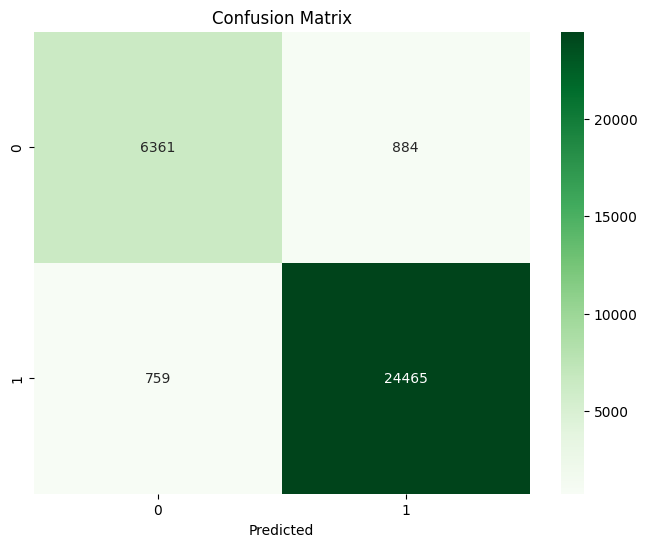

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the test set labels
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### RNN-LSTM

In [ ]:
# Create the RNN model
embedding_dim = 100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[glove_embeddings], input_length=maxlen, trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          2766200   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,808,505
Trainable params: 42,305
Non-trainable params: 2,766,200
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the checkpoint callback
history = model.fit(X_train_pad,
                    y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[checkpoint])

# Load the best model
model.load_weights("best_model.hdf5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, np.array(y_test))

print(f'Test loss: {test_loss}, \nTest accuracy: {test_accuracy*100}')


Epoch 1/15
3646/3653 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.7839
Epoch 1: val_accuracy improved from -inf to 0.77987, saving model to best_model.hdf5
3653/3653 [==============================] - 30s 8ms/step - loss: 0.4755 - accuracy: 0.7839 - val_loss: 0.4276 - val_accuracy: 0.7799
Epoch 2/15
3648/3653 [============================>.] - ETA: 0s - loss: 0.2320 - accuracy: 0.9064
Epoch 2: val_accuracy improved from 0.77987 to 0.94449, saving model to best_model.hdf5
3653/3653 [==============================] - 27s 7ms/step - loss: 0.2319 - accuracy: 0.9064 - val_loss: 0.1513 - val_accuracy: 0.9445
Epoch 3/15
3646/3653 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9499
Epoch 3: val_accuracy improved from 0.94449 to 0.95403, saving model to best_model.hdf5
3653/3653 [==============================] - 29s 8ms/step - loss: 0.1387 - accuracy: 0.9499 - val_loss: 0.1351 - val_accuracy: 0.9540
Epoch 4/15
3653/3653 [=====================

1015/1015 [==============================] - 3s 3ms/step
Accuracy: 0.960516184668453
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7245
           1       0.98      0.97      0.97     25224

    accuracy                           0.96     32469
   macro avg       0.94      0.95      0.94     32469
weighted avg       0.96      0.96      0.96     32469



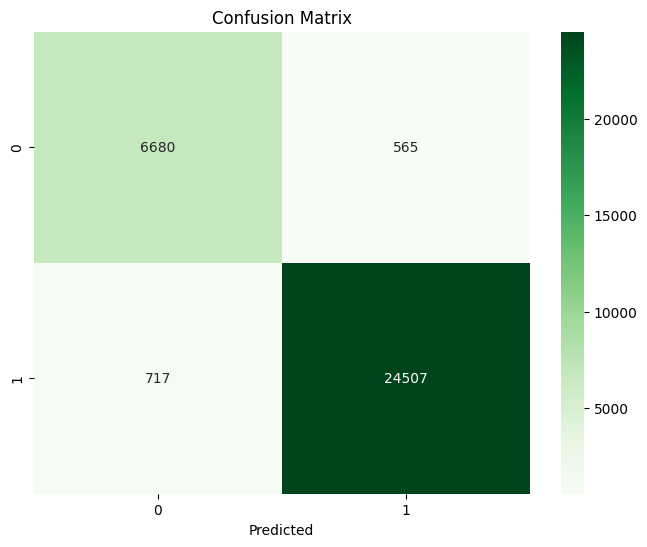

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the test set labels
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### CNN-LSTM

In [ ]:
# Create the CNN model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.callbacks import ModelCheckpoint
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

# Create the CNN-LSTM model
embedding_dim = 100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[glove_embeddings], input_length=maxlen, trainable=False),
    Conv1D(128, 5, activation='relu'),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


checkpoint = ModelCheckpoint("best_model_cnn.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


history = model.fit(X_train_pad,
                    y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[checkpoint])


model.load_weights("best_model_cnn.hdf5")

test_loss, test_accuracy = model.evaluate(X_test_pad, np.array(y_test))
print(f'Test loss: {test_loss}, \nTest accuracy: {test_accuracy*100}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          2766200   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,879,801
Trainable params: 113,601
Non-trainable params: 2,766,200
_________________________________________________________________
Epoch 1/15
3653/3653 [==============================] - ETA: 0s - loss: 0.4512 - accuracy: 0.8037
Epoch 1: val_accuracy improved from -inf to 0.89390, saving model to bes

1015/1015 [==============================] - 3s 3ms/step
Accuracy: 0.9570359419754227
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      7245
           1       0.97      0.97      0.97     25224

    accuracy                           0.96     32469
   macro avg       0.94      0.94      0.94     32469
weighted avg       0.96      0.96      0.96     32469



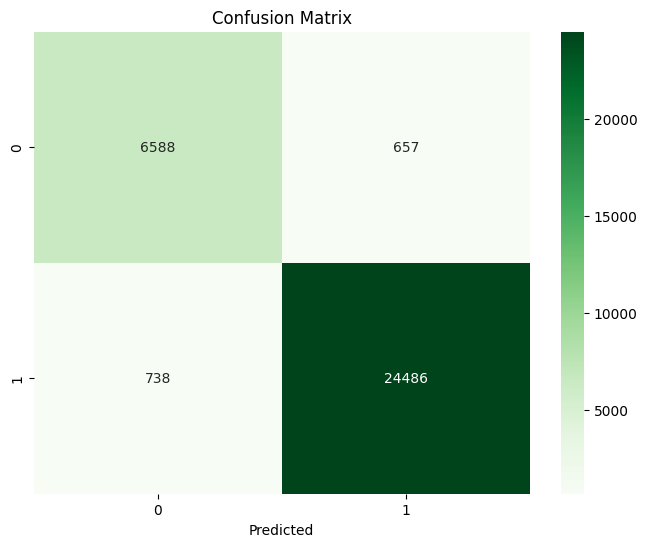

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the test set labels
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

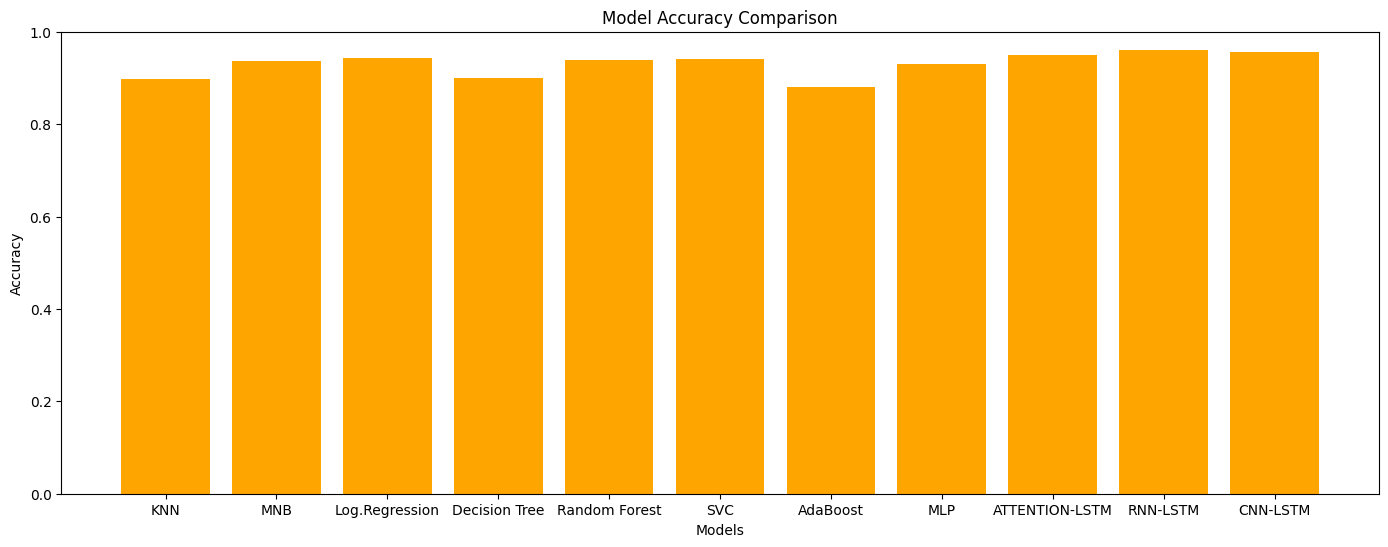

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'MNB', 'Log.Regression', 'Decision Tree', 'Random Forest', 'SVC', 'AdaBoost',
          'MLP', 'ATTENTION-LSTM', 'RNN-LSTM', 'CNN-LSTM']
plt.figure(figsize=(17, 6))
plt.bar(models, acc, color='orange')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.show()

### ROBERTA

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from torch.nn.utils.rnn import pad_sequence

# Load pre-trained RoBERTa model and tokenizer
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize and preprocess the text data
tokenized_texts = [tokenizer.tokenize(sent) for sent in X_train]
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

# Pad the sequences to a common length
input_ids_padded = pad_sequence([torch.tensor(ids) for ids in input_ids], batch_first=True, padding_value=1)  # Use padding_value=1 for RoBERTa
labels = torch.tensor(y_train)

# Create attention masks
attention_masks = torch.where(input_ids_padded != 1, torch.ones_like(input_ids_padded), torch.zeros_like(input_ids_padded))  # Use 1 for padding token in RoBERTa

train_dataset = TensorDataset(input_ids_padded, attention_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

epochs = 5

# Training loop
model.train()
for epoch in range(epochs):
    for batch_input, batch_masks, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(input_ids=batch_input, attention_mask=batch_masks, labels=batch_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()

with torch.no_grad():
    tokenized_texts = [tokenizer.tokenize(sent) for sent in X_test]
    input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]
    input_ids_padded = pad_sequence([torch.tensor(ids) for ids in input_ids], batch_first=True, padding_value=1)
    attention_masks = torch.where(input_ids_padded != 1, torch.ones_like(input_ids_padded), torch.zeros_like(input_ids_padded))
    labels = torch.tensor(y_test)

    outputs = model(input_ids=input_ids_padded, attention_mask=attention_masks)
    predicted_labels = torch.argmax(outputs.logits, dim=1)
    accuracy = (predicted_labels == labels).sum().item() / len(labels)
    print(f'Test accuracy: {accuracy * 100:.2f}%')


ModuleNotFoundError: ignored

### BERT

In [ ]:
pip install transformers


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from torch.nn.utils.rnn import pad_sequence

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize and preprocess the text data
tokenized_texts = [tokenizer.tokenize(sent) for sent in X_train]
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

# Pad the sequences to a common length
input_ids_padded = pad_sequence([torch.tensor(ids) for ids in input_ids], batch_first=True, padding_value=0)
labels = torch.tensor(y_train)

# Create attention masks
attention_masks = torch.where(input_ids_padded != 0, torch.ones_like(input_ids_padded), torch.zeros_like(input_ids_padded))


train_dataset = TensorDataset(input_ids_padded, attention_masks, labels)  # Include attention_masks
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)


epochs = 5

# Training loop
model.train()
for epoch in range(epochs):
    for batch_input, batch_masks, batch_labels in train_loader:  # Include batch_masks
        optimizer.zero_grad()
        outputs = model(input_ids=batch_input, attention_mask=batch_masks, labels=batch_labels)  # Pass attention_mask
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()

with torch.no_grad():
    tokenized_texts = [tokenizer.tokenize(sent) for sent in X_test]
    input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]
    input_ids_padded = pad_sequence([torch.tensor(ids) for ids in input_ids], batch_first=True, padding_value=0)
    attention_masks = torch.where(input_ids_padded != 0, torch.ones_like(input_ids_padded), torch.zeros_like(input_ids_padded))
    labels = torch.tensor(y_test)

    outputs = model(input_ids=input_ids_padded, attention_mask=attention_masks)
    predicted_labels = torch.argmax(outputs.logits, dim=1)
    accuracy = (predicted_labels == labels).sum().item() / len(labels)
    print(f'Test accuracy: {accuracy * 100:.2f}%')
